In [1]:
!git clone https://github.com/vetka925/ods_nlp_baselines /content/ods_nlp_baselines

Cloning into '/content/ods_nlp_baselines'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 53 (delta 16), reused 25 (delta 7), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [2]:
import warnings
warnings.filterwarnings('ignore')


import sys

sys.path.append('/content/ods_nlp_baselines/')

# data folder contains data from Kaggle competition https://www.kaggle.com/c/nlp-getting-started/data
data_folder = '/content/ods_nlp_baselines/data/'

!pip install -r "/content/ods_nlp_baselines/requirements.txt"

     |████████████████████████████████| 409kB 6.2MB/s 
     |████████████████████████████████| 1.1MB 13.5MB/s 
     |████████████████████████████████| 276kB 24.8MB/s 
     |████████████████████████████████| 2.8MB 17.8MB/s 
     |████████████████████████████████| 1.1MB 36.3MB/s 
     |████████████████████████████████| 3.0MB 41.3MB/s 
     |████████████████████████████████| 890kB 38.4MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=8f8098ad578aad6226fe60f406ad4d60229dc24fc85cd583c37a89df711f7cd8
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=c4e7cc82cb57e9d24da57e0d1081ba2c624735c7e4b241641faa561f5e2a8baf
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built PyYAML sacremoses
ERROR: tensorflow 2.3.0 has requirem

###### DATA INFO ######

### TEXT LENGTH ###

Total number of samples: 7521
Classname: target

### TEXT LENGTH ###

count    7521.000000
mean      100.880734
std        33.812307
min         7.000000
25%        77.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text, dtype: float64

#################


#################

### TARGET ###

Num classes: 2

Class 0: 0

Class 1: 1


#################


### DATA HEAD ###

   target                                               text
0       0  Brooklyn locksmith: domesticate emergency mech...
1       0  Complete Solution to Get Rid of http://t.co/9C...
2       1  #reuters Twelve feared killed in Pakistani air...
3       0  Trust us to get rescued by the dopey ones.  #E...
4       0                  @Hail_Zel man you kno I'm there !
5       1  North Sac Elkhorn Blvd / Walerga Rd **Trfc Col...
6       1  George Njenga the hero saved his burning frien...
7       0  'I can't have kids cuz I got in a bicycle acci...
8   

'Data prepared for train'

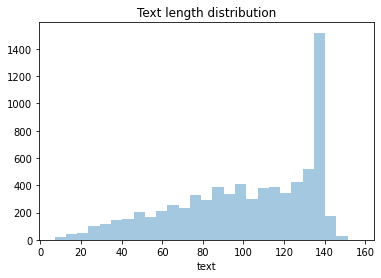

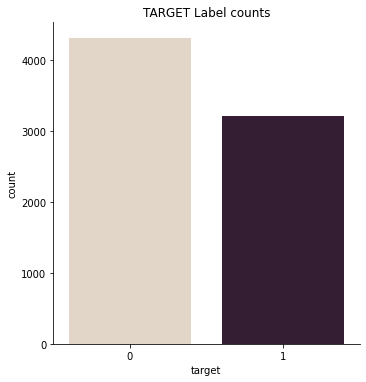

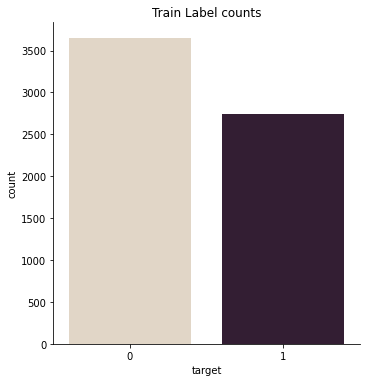

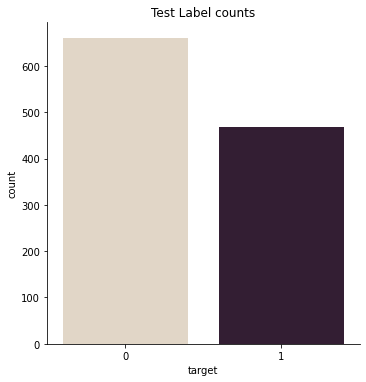

In [3]:
from auto_classifier.common import DataProcessor
regex = [r'(@|#)(\w+)', r'[(RT_:)|(RT:)]'] # rexexp for cleaning.
data = DataProcessor(data=data_folder+'train.csv',
                     class_column_name='target')
data.load_data(sep=',')
data.prepare(regex, test_size=0.15)

In [4]:
from auto_classifier.models import AutoLinearModel
from auto_classifier.common import AutoClassifier
from sklearn.metrics import f1_score

auto_classifier = AutoClassifier(data)
auto_classifier.params_prepare()
if data.y_train.nunique() > 2:
  from functools import partial
  score_funcs = {'f1': partial(f1_score, average='macro')}
else:
  score_funcs = {'f1': f1_score}

report = auto_classifier.get_report(metrics_dict=score_funcs)

Model: LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
Model: LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
Model: LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
Model: LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
Model: LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
Model: LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ov

# Новый раздел

In [5]:
!pip install transformers

In [6]:
from auto_classifier.utils import prepare_dataset, prepare_features, predict_bert
from torch.utils.data import DataLoader, RandomSampler
from auto_classifier.models import BertFinetuner
import pytorch_lightning as pl
from transformers import (
    BertModel,
    BertTokenizer
)

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert = BertModel.from_pretrained('bert-base-cased', output_attentions=True)

batch_size = 16


train_dataset = prepare_dataset(data.X_train.values, data.y_train.values, tokenizer)
val_dataset = prepare_dataset(data.X_test.values, data.y_test.values, tokenizer)

train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size
        )

validation_dataloader = DataLoader(
            val_dataset, 
            sampler = RandomSampler(val_dataset), 
            batch_size = batch_size 
        )

bert_finetuner = BertFinetuner(bert, train_dataloader, validation_dataloader)

trainer = pl.Trainer(gpus=1, max_epochs=2)    
trainer.fit(bert_finetuner) 



GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | bert       | BertModel  | 108 M 
1 | classifier | Sequential | 1 K   


Saving latest checkpoint..


1

In [7]:
from sklearn.metrics import classification_report, f1_score
import torch
import pandas as pd
score_funcs = {'f1': f1_score}
result = {}
preds = predict_bert(data.X_test, bert_finetuner, tokenizer)
b_report = classification_report(data.y_test, preds, output_dict=True)
for label in data.y_train.unique():
    result[f"{label}_precision"] = [b_report[str(label)]["precision"]]
    result[f"{label}_recall"] = [b_report[str(label)]["recall"]]
for metric in score_funcs:
    result['model'] = ['bert']
    result[metric] = [score_funcs[metric](data.y_test, preds)]
result['params'] = [str(bert_finetuner.configure_optimizers())]


report = pd.concat([report, pd.DataFrame(result)])
report.sort_values('f1', ascending=False).head(10)

,vectorizer,model,params,1_precision,1_recall,0_precision,0_recall,f1
0,NaN,bert,Adam (\nParameter Group 0\n amsgrad: False\...,0.863636,0.730769,0.828104,0.918306,0.791667
71,supervised_ngram_level,"LinearSVC(C=0.1, class_weight=None, dual=True,...","{'C': 0.1, 'loss': 'squared_hinge', 'tol': 1e-05}",0.783784,0.743590,0.824818,0.854766,0.763158
70,supervised_ngram_level,"LinearSVC(C=0.1, class_weight=None, dual=True,...","{'C': 0.1, 'loss': 'squared_hinge', 'tol': 0.0...",0.783784,0.743590,0.824818,0.854766,0.763158
69,supervised_ngram_level,"LinearSVC(C=0.1, class_weight=None, dual=True,...","{'C': 0.1, 'loss': 'squared_hinge', 'tol': 0.001}",0.783784,0.743590,0.824818,0.854766,0.763158
99,supervised_word_level,"LinearSVC(C=0.1, class_weight=None, dual=True,...","{'C': 0.1, 'loss': 'squared_hinge', 'tol': 0.001}",0.813107,0.715812,0.814505,0.883510,0.761364
100,supervised_word_level,"LinearSVC(C=0.1, class_weight=None, dual=True,...","{'C': 0.1, 'loss': 'squared_hinge', 'tol': 0.0...",0.813107,0.715812,0.814505,0.883510,0.761364
101,supervised_word_level,"LinearSVC(C=0.1, class_weight=None, dual=True,...","{'C': 0.1, 'loss': 'squared_hinge', 'tol': 1e-05}",0.813107,0.715812,0.814505,0.883510,0.761364
74,supervised_ngram_level,"LinearSVC(C=1, class_weight=None, dual=True, f...","{'C': 1, 'loss': 'hinge', 'tol': 1e-05}",0.776286,0.741453,0.822581,0.848714,0.758470
72,supervised_ngram_level,"LinearSVC(C=1, class_weight=None, dual=True, f...","{'C': 1, 'loss': 'hinge', 'tol': 0.001}",0.776286,0.741453,0.822581,0.848714,0.758470
73,supervised_ngram_level,"LinearSVC(C=1, class_weight=None, dual=True, f...","{'C': 1, 'loss': 'hinge', 'tol': 0.0001}",0.776286,0.741453,0.822581,0.848714,0.758470
